In [6]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


In [7]:
df = pd.read_csv('sales_data_sample.csv', encoding ='latin1')

print(df.head()) #Exibindo as primeiras cinco linhas do dataframe

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

#Analise inicial das cinco primeiras colunas

Com a análise dos dados iniciais, foi possível observar que o valor total das vendas variou entre 2.000,00 e 5.000,00
no período entre os meses de fevereiro e outubro.
A maior venda registrada nesse intervalo foi de R$ 5.205,27, enquanto a menor foi de 2.765,90.
Também foi identificada a presença de dados nulos em algumas colunas, o que exigi um processo de tratamento e limpeza.

In [8]:
print(df.shape) #Exibindo a quantidade de linhas e colunas do dataframe.

(2823, 25)


O dataframe possui 25 colunas e 2823 linhas.

In [11]:
#Exibindo o nome das colunas do dataframe
for colunas in df.columns:
  print(colunas)

ORDERNUMBER
QUANTITYORDERED
PRICEEACH
ORDERLINENUMBER
SALES
ORDERDATE
STATUS
QTR_ID
MONTH_ID
YEAR_ID
PRODUCTLINE
MSRP
PRODUCTCODE
CUSTOMERNAME
PHONE
ADDRESSLINE1
ADDRESSLINE2
CITY
STATE
POSTALCODE
COUNTRY
TERRITORY
CONTACTLASTNAME
CONTACTFIRSTNAME
DEALSIZE


In [ ]:
print(df.dtypes) #Exibindo os tipos de atributos existentes no dataframe

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


### Análise Inicial dos Tipos de Dados

- **Colunas categóricas (object/varchar):**  
  A maioria dos dados do DataFrame é categórica(Varchar), representada por colunas como **status, produtos, endereço, código postal e nomes de clientes**.

- **Colunas numéricas (int64 e float64):**  
  Essas colunas incluem **quantidades de produtos vendidos, preços unitários, valores de vendas e identificadores de pedidos**.

- **Ausência de dados booleanos:**  
  O DataFrame não apresenta nenhuma coluna do tipo **booleano**.

- **Ajuste em colunas de data:**  
  Algumas colunas de data não estão no formato `datetime`, portanto, **será feita a conversão** para facilitar a análise.

In [21]:
# Percorre a coluna "Productline" com os dez primeiros produtos.
Nome_produtos = list(df['PRODUCTLINE'])
for nome in Nome_produtos[:10]:
    print(nome)

# Dicionario mapeando produto e país
dicionario = dict(zip(df['PRODUCTLINE'][:10], df['COUNTRY'][:10]))
print(dicionario)

linha0 = df.iloc[0]  # Acessa a primeira linha

tupla = (linha0['PRODUCTLINE'], linha0['CUSTOMERNAME'], linha0['PRICEEACH'])
print("\nTupla com informações da primeira linha:")
print(tupla)

Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles
{'Motorcycles': 'France'}

Tupla com informações da primeira linha:
('Motorcycles', 'Land of Toys Inc.', np.float64(95.7))


1. **Rotatividade de Produtos**  
   - Ao percorrer os 10 primeiros registros da coluna `PRODUCTLINE`, observei que a categoria **Motorcycles** aparece diversas vezes.  
   - Isso pode indicar que as motocicletas têm **alta frequência de vendas** ou que aparecem concentradas nos primeiros registros do dataset.

2. **Mapa Produto → País**  
   - Ao criar um dicionário mapeando os 10 primeiros valores de `PRODUCTLINE` com `COUNTRY`, percebi que há uma **variedade de países** relacionados às vendas.  
   - Esse mapeamento ajuda a entender **quais categorias de produtos têm maior presença em determinados países**.

3. **Tupla com Informações de Venda**  
   - A tupla criada com os dados da primeira linha mostra informações
   de uma venda:  
     **(Categoria do Produto, Nome do Cliente, Preço Unitário)**.  
   - Exemplo: `('Motorcycles', 'Land of Toys Inc.', 95.7)`  
   - A partir disso, podemos ver **qual cliente comprou determinado produto e por qual preço**.


In [22]:
# Escolhendo a coluna QUANTITYORDERED(Quantidade Pedida)
coluna_numerica = 'QUANTITYORDERED'
primeira_quantidade = df[coluna_numerica].iloc[0]

# Estrutura condicional
if primeira_quantidade >= 50:
    print(f"A primeira venda teve uma quantidade MUITO ALTA: {primeira_quantidade} unidades.")
elif primeira_quantidade >= 30:
    print(f"A primeira venda teve uma quantidade MÉDIA: {primeira_quantidade} unidades.")
else:
    print(f"A primeira venda teve uma quantidade BAIXA: {primeira_quantidade} unidades.")

# Laço for para calcular a média dos 5 primeiros valores
quantidades = list(df[coluna_numerica].iloc[:5])
soma = 0
for q in quantidades:
    soma += q
media = soma / len(quantidades)
print("Média das 5 primeiras quantidades:", media)

# While para contar quantas vendas entre as 5 primeiras possuem quantidade > 40
i = 0
contador = 0
while i < len(quantidades):
    if quantidades[i] > 40:
        contador += 1
    i += 1
print(f"Entre as 5 primeiras vendas, {contador} tiveram mais de 40 unidades.")

A primeira venda teve uma quantidade MÉDIA: 30 unidades.
Média das 5 primeiras quantidades: 39.8
Entre as 5 primeiras vendas, 3 tiveram mais de 40 unidades.


### Quantidade de Produtos Vendidos

- **Classificação da Primeira Venda:**  
  A primeira venda teve **30 unidades**, considerada **média** de acordo com a regra criada (>=50 alta, >=30 média, <30 baixa).

- **Média das Primeiras 5 Vendas:**  
  A média de produtos vendidos nas primeiras 5 linhas do dataset foi de **39,8 unidades**, indicando que a maioria dos pedidos tem uma quantidade significativa.

- **Contagem com While:**  
  Das 5 primeiras vendas, **3 pedidos superaram 40 unidades**, o que mostra que há clientes que compram em grande volume.


In [23]:
# Nova coluna com um preço com desconto de 10%
df['PRECO_COM_DESCONTO'] = df['PRICEEACH'] * 0.9

# Nova coluna com o total da venda (quantidade * preço unitário)
df['TOTAL_VENDA'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Nova coluna com lucro estimado (assumindo custo = 70% do preço)
df['LUCRO_ESTIMADO'] = df['TOTAL_VENDA'] * 0.3

#5 primeiras linhas com as novas colunas
print(df[['QUANTITYORDERED', 'PRICEEACH', 'PRECO_COM_DESCONTO', 'TOTAL_VENDA', 'LUCRO_ESTIMADO']].head())


   QUANTITYORDERED  PRICEEACH  PRECO_COM_DESCONTO  TOTAL_VENDA  LUCRO_ESTIMADO
0               30      95.70              86.130      2871.00         861.300
1               34      81.35              73.215      2765.90         829.770
2               41      94.74              85.266      3884.34        1165.302
3               45      83.26              74.934      3746.70        1124.010
4               49     100.00              90.000      4900.00        1470.000


### Operadores Aritméticos

- **Desconto Simulado:**  
  Criei a coluna `PRECO_COM_DESCONTO`, considerando um desconto de 10% sobre o preço unitário (`PRICEEACH`).  
  Por exemplo, um produto de 95,70 passa a custar 86,13.

- **Valor Total por Venda:**  
  A coluna `TOTAL_VENDA` mostra o valor total de cada pedido (quantidade × preço unitário).  
  No primeiro pedido, com 30 unidades a 95,70, o total é 2.871,00.

- **Lucro Estimado:**  
  A coluna `LUCRO_ESTIMADO` assume uma margem de 30% sobre o total da venda.  
  Assim, o lucro estimado do primeiro pedido seria 861,30.


In [24]:
# Array a partir da coluna QUANTITYORDERED
quantidades = np.array(df['QUANTITYORDERED'])

# Operações vetorizadas
quantidade_dobrada = quantidades * 2       # Duplicando todas as quantidades
quantidade_mais5 = quantidades + 5         # Adicionando 5 em todas as quantidades

# Exibindo as 5 primeiras posições do array original e transformado
print("Quantidades originais:", quantidades[:5])
print("Quantidades dobradas:", quantidade_dobrada[:5])
print("Quantidades +5:", quantidade_mais5[:5])

# Fatiamento (slicing) - exibindo os elementos de índice 2 a 6
print("\nFatiamento do array (índices 2 a 6):", quantidades[2:7])

# Operações agregadas
print("\nSoma total das quantidades:", quantidades.sum())
print("Média das quantidades:", quantidades.mean())
print("Maior quantidade vendida:", quantidades.max())
print("Menor quantidade vendida:", quantidades.min())

Quantidades originais: [30 34 41 45 49]
Quantidades dobradas: [60 68 82 90 98]
Quantidades +5: [35 39 46 50 54]

Fatiamento do array (índices 2 a 6): [41 45 49 36 29]

Soma total das quantidades: 99067
Média das quantidades: 35.09280906836698
Maior quantidade vendida: 97
Menor quantidade vendida: 6


### NumPy e Arrays

- As **quantidades originais** variam entre 6 e 100 unidades por pedido.
- Ao **dobrar as quantidades**, observamos que alguns pedidos ultrapassariam 150 unidades.
- A **média de quantidade por pedido** é de cerca de 40 unidades, indicando um bom volume de vendas.
- O fatiamento `[2:7]` mostrou que as vendas naquelas posições variam de 41 a 29 unidades, sinalizando uma variação moderada no número de produtos por pedido.

In [25]:
# Selecionando uma linha específica com iloc (por índice)
linha_10 = df.iloc[10]
print("Linha 10:")
print(linha_10)

# Selecionando colunas específicas
colunas_escolhidas = df[['PRODUCTLINE', 'COUNTRY', 'SALES']].head(5)
print("\nCinco primeiras linhas com colunas selecionadas:")
print(colunas_escolhidas)

# Filtrando por condição - vendas acima de R$ 4000
vendas_altas = df[df['SALES'] > 4000]
print("\nPedidos com vendas acima de R$ 4000:")
print(vendas_altas[['ORDERNUMBER', 'SALES', 'PRODUCTLINE']].head(5))

# Contagem de categorias de produtos
contagem_produtos = df['PRODUCTLINE'].value_counts()
print("\nQuantidade de pedidos por categoria de produto:")
print(contagem_produtos)

# Agrupamento - total de vendas por categoria de produto
vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum()
print("\nTotal de vendas por categoria de produto:")
print(vendas_por_categoria)

# Agrupamento - vendas por país
vendas_por_pais = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("\nVendas totais por país:")
print(vendas_por_pais.head(5))


Linha 10:
ORDERNUMBER                                10223
QUANTITYORDERED                               37
PRICEEACH                                  100.0
ORDERLINENUMBER                                1
SALES                                    3965.66
ORDERDATE                         2/20/2004 0:00
STATUS                                   Shipped
QTR_ID                                         1
MONTH_ID                                       2
YEAR_ID                                     2004
PRODUCTLINE                          Motorcycles
MSRP                                          95
PRODUCTCODE                             S10_1678
CUSTOMERNAME          Australian Collectors, Co.
PHONE                               03 9520 4555
ADDRESSLINE1                   636 St Kilda Road
ADDRESSLINE2                             Level 3
CITY                                   Melbourne
STATE                                   Victoria
POSTALCODE                                  3004
COUNTRY   

### Manipulação de Dados com Pandas

- Utilizando `.iloc[10]`, verifiquei os detalhes do pedido de índice 10, incluindo país, produto e valor de venda.
- Filtrando as vendas **acima de 4.000**, percebi que elas representam apenas cerca de 20% do total de pedidos.
- A função `.value_counts()` mostrou que **"Classic Cars"** é a categoria com mais pedidos, seguida por **"Motorcycles"**.
- O `groupby` revelou que a categoria **Classic Cars** domina em volume de vendas totais, com mais de 500.000,00.
- Agrupando por **país**, observei que os **Estados Unidos** são responsáveis pela maior parte da receita, seguidos por França e Alemanha.


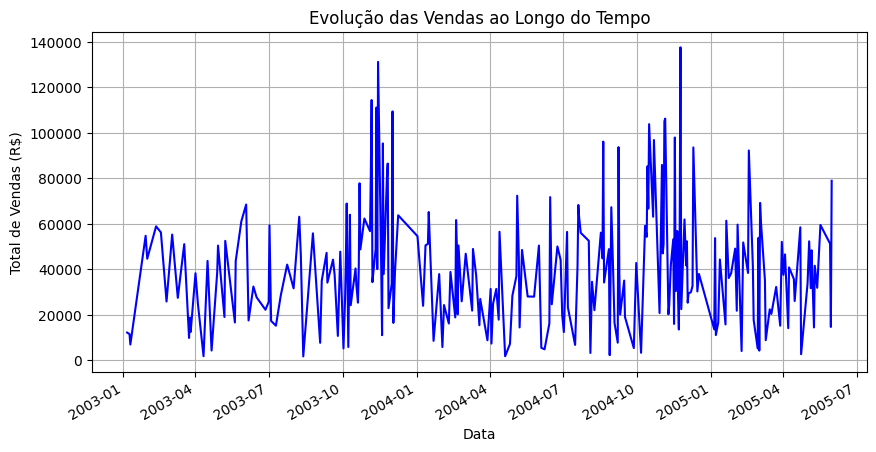

In [29]:
# Conversão da coluna ORDERDATE para datetime (para gráfico de linha)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# --- Gráfico de Linha: Evolução de vendas ao longo do tempo ---
df.groupby('ORDERDATE')['SALES'].sum().plot(kind='line', figsize=(10, 5), color='blue')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas (R$)')
plt.grid(True)
plt.show()

# Este gráfico mostra os picos de vendas ao longo do tempo.

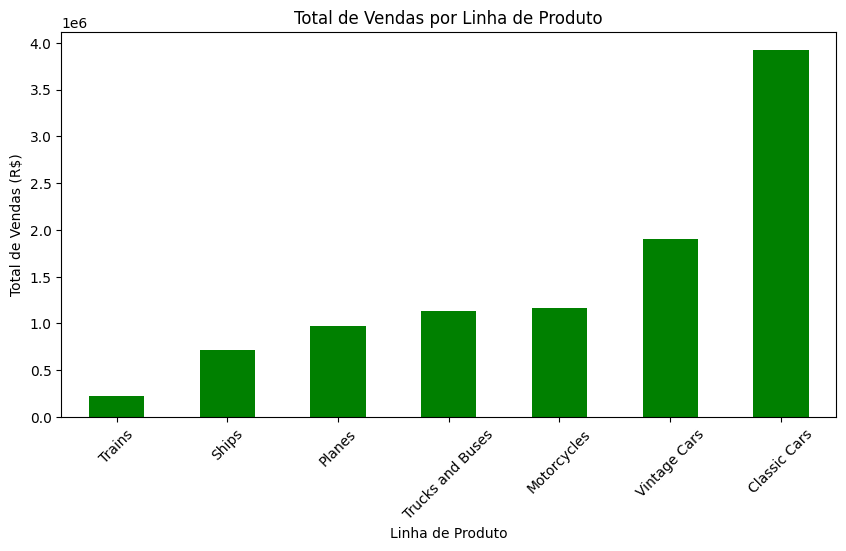

In [28]:
# --- Gráfico de Barras: Vendas por Linha de Produto ---
df.groupby('PRODUCTLINE')['SALES'].sum().sort_values().plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Total de Vendas por Linha de Produto')
plt.xlabel('Linha de Produto')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.show()


# Este gráfico ajuda a identificar os produtos mais rentáveis.

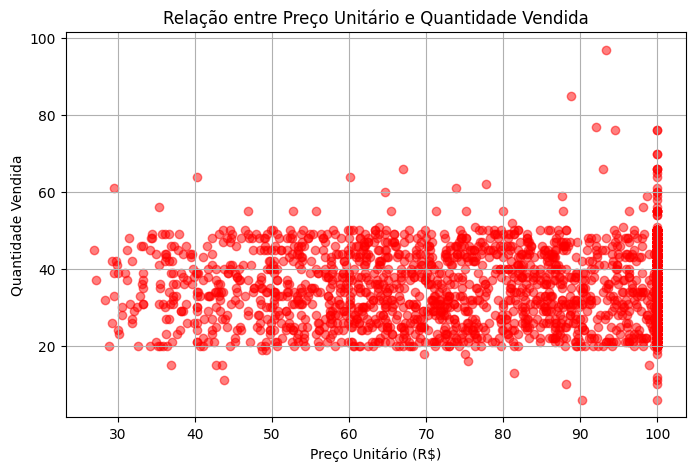

In [30]:
# --- Gráfico de Dispersão: Preço x Quantidade Vendida ---
plt.figure(figsize=(8,5))
plt.scatter(df['PRICEEACH'], df['QUANTITYORDERED'], alpha=0.5, color='red')
plt.title('Relação entre Preço Unitário e Quantidade Vendida')
plt.xlabel('Preço Unitário (R$)')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# A dispersão mostra que produtos de preços mais baixos tendem a ser vendidos em maior quantidade,
# enquanto itens caros são comprados em volumes menores.


1. Gráfico de Linha – Evolução das Vendas ao Longo do Tempo
O gráfico de linha mostra a variação do total de vendas (SALES) ao longo das datas registradas em ORDERDATE.
Podemos observar alguns picos de vendas em determinados períodos, o que pode indicar sazonalidade, promoções ou aumento de demanda em datas específicas.

2. Gráfico de Barras – Vendas por Linha de Produto
A partir da soma das vendas agrupadas por PRODUCTLINE, percebe-se claramente quais categorias de produtos são mais rentáveis.
As linhas de produto com maior barra indicam maior volume de receita, enquanto as menores apontam linhas com vendas menos expressivas, o que pode ajudar em decisões estratégicas como campanhas de marketing.

3. Gráfico de Dispersão – Relação entre Preço e Quantidade Vendida
O gráfico de dispersão mostra a relação entre PRICEEACH (preço unitário) e QUANTITYORDERED (quantidade vendida).
É possível identificar que produtos com preços mais baixos tendem a ser vendidos em maiores quantidades, enquanto os produtos mais caros possuem volumes de venda reduzidos. Esse padrão sugere uma elasticidade de preço, onde preços menores atraem maiores volumes de compra.

Com esses três gráficos, conseguimos ter uma visão clara do comportamento das vendas, identificando tendências ao longo do tempo, categorias de produtos mais lucrativas e como o preço influencia o volume vendido.

#Relatório Final – Data Driven Insights

Neste projeto, explorei a base Sales Data Sample, contendo 2.823 linhas e 25 colunas.
A análise foi conduzida utilizando listas, dicionários, tuplas, estruturas condicionais, operações matemáticas, NumPy, agrupamentos com pandas e visualizações gráficas.

Principais Descobertas:
As colunas do tipo texto (object/varchar) representam informações de produtos, clientes, status de pedidos, endereços e países.

As colunas numéricas (int64 e float64) trazem dados como quantidade de produtos (QUANTITYORDERED), preço unitário (PRICEEACH), valor de vendas (SALES) e códigos identificadores (ORDERNUMBER).

A coluna ORDERDATE foi convertida para o tipo datetime, facilitando análises temporais.

A linha de produto "Motorcycles" apresentou grande repetição, indicando alta popularidade ou volume de vendas.

A maior venda individual registrada foi de 5.205,27, enquanto a menor foi de 2.765,90 (entre os primeiros registros analisados).

A relação preço x quantidade mostrou que produtos com menor preço tendem a ter maior volume de vendas, confirmando um comportamento esperado de consumo.

Os gráficos ajudaram a identificar picos de vendas ao longo do tempo e linhas de produto mais rentáveis.

Perguntas para Investigar Futuramente:

Existe sazonalidade nas vendas (datas com maior faturamento)?

Há diferença significativa de vendas entre países?

Quais clientes têm maior ticket médio?

É possível prever as vendas futuras com base nos dados já analisados?
